In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

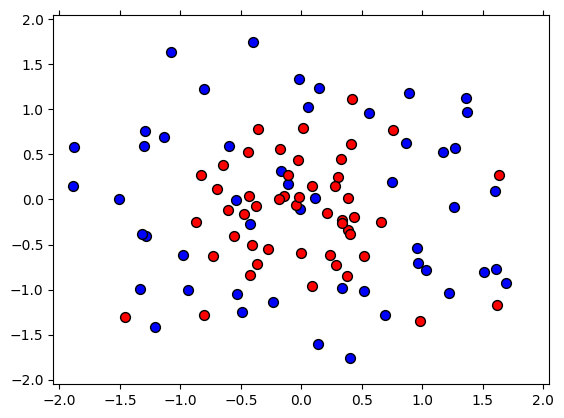

In [15]:
def load_points(data_file_name):
    data = pd.read_csv(data_file_name, header=None)
    data = np.asarray(data)
    X = data[:,0:2]
    y = data[:,2]
    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')
    return X, y

    
data_file_name = "data_grid.csv"
X, y = load_points(data_file_name)

In [18]:
random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

In [21]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

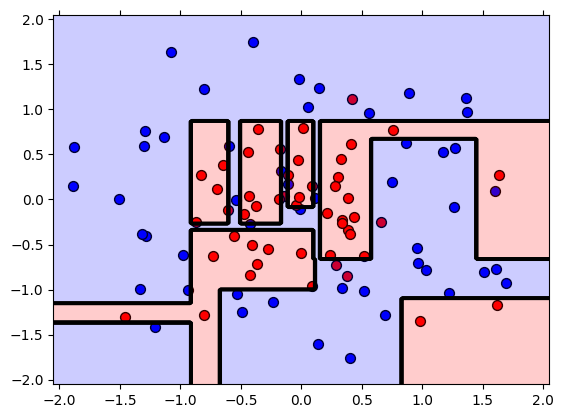

training f1_score: 1.0
test f1_score: 0.7000000000000001


In [22]:
plot_model(X, y, model)
print(f'training f1_score: {f1_score(train_prediction, y_train)}')
print(f'test f1_score: {f1_score(test_prediction, y_test)}')

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)
train f1_score = 0.8148148148148148
test f1_score = 0.8


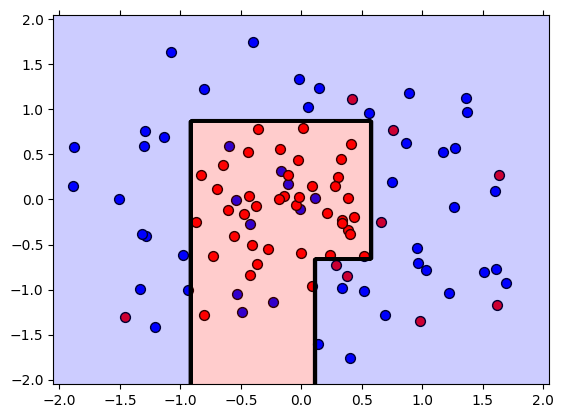

In [35]:
model = DecisionTreeClassifier(random_state=42)

scorer = make_scorer(f1_score)

parameters = {'max_depth':[4,5,8], 'min_samples_leaf':[2,3,4,5], 'min_samples_split':[2,3,4,5]}

grid_model = GridSearchCV(estimator=model, param_grid=parameters, scoring=scorer)
grid_model_fit = grid_model.fit(X_train, y_train)
best_model = grid_model_fit.best_estimator_

print(best_model)

best_model.fit(X_train, y_train)
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_score = f1_score(train_predictions, y_train)
test_score = f1_score(test_predictions, y_test)

print(f'train f1_score = {train_score}')
print(f'test f1_score = {test_score}')

plot_model(X, y, best_model)

